***POISSON EQUATION: CASE 4***

**1. Solve the system by the iterative method and analyse the number of iterations required for a relative tolerance of 10−4 between iterations. Analyze how the number of iterations scales with the set relative tolerance.**


Tolerance: 1e-06, Iterations: 3708
Tolerance: 1e-05, Iterations: 2591
Tolerance: 1e-04, Iterations: 1492
Tolerance: 1e-03, Iterations: 541
Tolerance: 1e-02, Iterations: 88


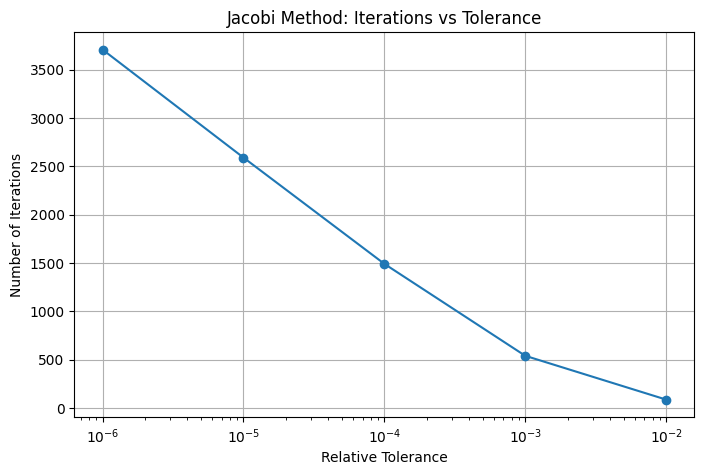

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_poisson(nx, ny, tol=1e-4, max_iter=10000):
    # Grid spacing
    dx = 1.0 / (nx - 1)
    dy = 1.0 / (ny - 1)
    dx2 = dx**2
    dy2 = dy**2
    h2 = dx2  # assuming dx = dy

    # Initial guess
    w = np.zeros((ny, nx))
    w_new = np.zeros_like(w)

    # Source term (constant forcing)
    f = -1.0  # RHS of Poisson (normalized)

    iterations = 0
    residual = np.inf

    while residual > tol and iterations < max_iter:
        w_new[1:-1, 1:-1] = 0.25 * (
            w[1:-1, :-2] + w[1:-1, 2:] +
            w[:-2, 1:-1] + w[2:, 1:-1] -
            h2 * f
        )

        residual = np.linalg.norm(w_new - w) / np.linalg.norm(w_new)
        w[:, :] = w_new
        iterations += 1

    return iterations, w

# Analyze iterations for different tolerances
tolerances = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]
iteration_counts = []

for tol in tolerances:
    iters, _ = jacobi_poisson(50, 50, tol=tol)
    iteration_counts.append(iters)
    print(f"Tolerance: {tol:.0e}, Iterations: {iters}")

# Plotting
plt.figure(figsize=(8, 5))
plt.semilogx(tolerances, iteration_counts, marker='o')
#plt.gca().invert_xaxis()
plt.xlabel("Relative Tolerance")
plt.ylabel("Number of Iterations")
plt.title("Jacobi Method: Iterations vs Tolerance")
plt.grid(True)
plt.show()


Tolerance: 1e-06, Iterations: 3708, Time: 0.1116 s
Tolerance: 1e-05, Iterations: 2591, Time: 0.0778 s
Tolerance: 1e-04, Iterations: 1492, Time: 0.0417 s
Tolerance: 1e-03, Iterations: 541, Time: 0.0167 s
Tolerance: 1e-02, Iterations: 88, Time: 0.0000 s


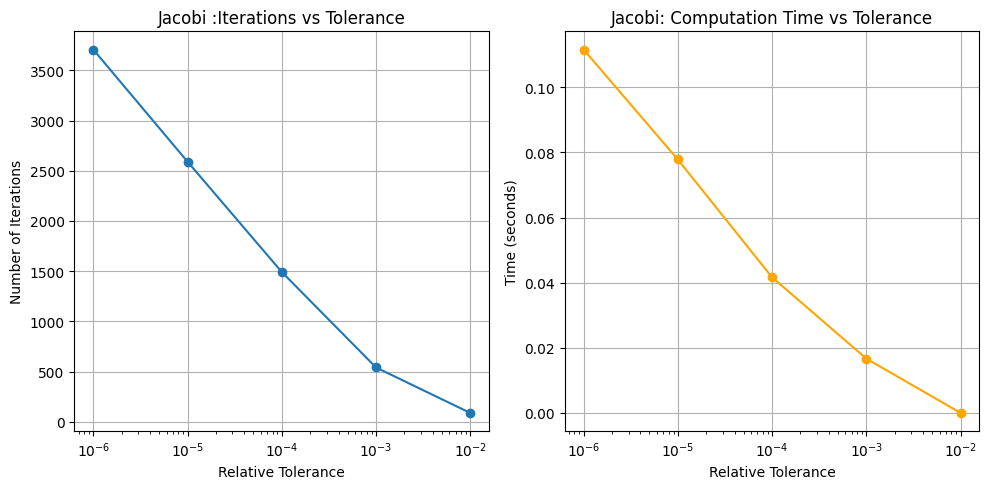

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jacobi_poisson(nx, ny, tol=1e-4, max_iter=10000):
    dx = 1.0 / (nx - 1)
    dy = 1.0 / (ny - 1)
    h2 = dx**2  # assuming dx = dy

    w = np.zeros((ny, nx))
    w_new = np.zeros_like(w)
    f = -1.0  # RHS of Poisson

    iterations = 0
    residual = np.inf

    start_time = time.time()
    while residual > tol and iterations < max_iter:
        w_new[1:-1, 1:-1] = 0.25 * (
            w[1:-1, :-2] + w[1:-1, 2:] +
            w[:-2, 1:-1] + w[2:, 1:-1] -
            h2 * f
        )

        residual = np.linalg.norm(w_new - w) / np.linalg.norm(w_new)
        w[:, :] = w_new
        iterations += 1
    end_time = time.time()

    elapsed_time = end_time - start_time
    return iterations, elapsed_time, w

# Analyze iterations and computation times
tolerances = [1e-6, 1e-5, 1e-4,1e-3, 1e-2]
iteration_counts = []
times = []

for tol in tolerances:
    iters, elapsed, _ = jacobi_poisson(50, 50, tol=tol)
    iteration_counts.append(iters)
    times.append(elapsed)
    print(f"Tolerance: {tol:.0e}, Iterations: {iters}, Time: {elapsed:.4f} s")

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.semilogx(tolerances, iteration_counts, marker='o')
#plt.gca().invert_xaxis()
plt.xlabel("Relative Tolerance")
plt.ylabel("Number of Iterations")
plt.title("Jacobi :Iterations vs Tolerance")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogx(tolerances, times, marker='o', color='orange')
#plt.gca().invert_xaxis()
plt.xlabel("Relative Tolerance")
plt.ylabel("Time (seconds)")
plt.title("Jacobi: Computation Time vs Tolerance")
plt.grid(True)

plt.tight_layout()
plt.show()


**2. Solve the same system by the Gauss-Seidel iterative method and compare the number of iterations as well as the time for computation. Do this for different mesh sizes.**


Mesh 20x20 -> Jacobi: 360 iters, Computation time: 0.006s | Gauss-Seidel: 206 iters, Computation time: 0.025s
Mesh 40x40 -> Jacobi: 1080 iters, Computation time: 0.019s | Gauss-Seidel: 646 iters, Computation time: 0.409s
Mesh 60x60 -> Jacobi: 1915 iters, Computation time: 0.039s | Gauss-Seidel: 1191 iters, Computation time: 1.756s


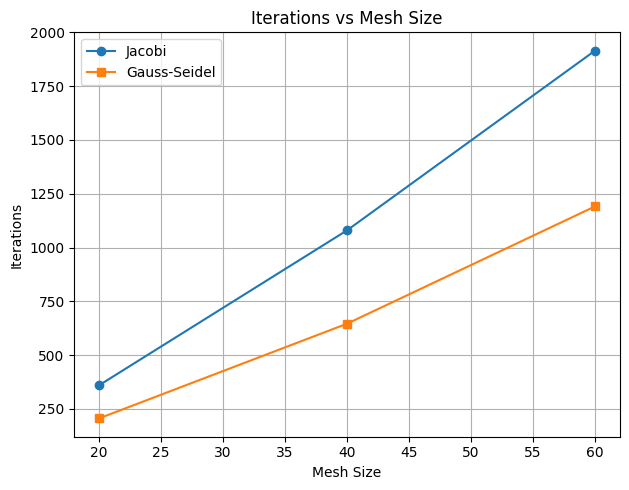

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jacobi_poisson(nx, ny, tol=1e-4, max_iter=10000):
    dx = 1.0 / (nx - 1)
    h2 = dx**2
    w = np.zeros((ny, nx))
    w_new = np.zeros_like(w)
    f = -1.0

    iterations = 0
    residual = np.inf

    start_time = time.time()
    while residual > tol and iterations < max_iter:
        w_new[1:-1, 1:-1] = 0.25 * (
            w[1:-1, :-2] + w[1:-1, 2:] +
            w[:-2, 1:-1] + w[2:, 1:-1] -
            h2 * f
        )
        residual = np.linalg.norm(w_new - w) / np.linalg.norm(w_new)
        w[:, :] = w_new
        iterations += 1
    return iterations, time.time() - start_time

def gauss_seidel_poisson(nx, ny, tol=1e-4, max_iter=10000):
    dx = 1.0 / (nx - 1)
    h2 = dx**2
    w = np.zeros((ny, nx))
    f = -1.0

    iterations = 0
    residual = np.inf

    start_time = time.time()
    while residual > tol and iterations < max_iter:
        w_old = w.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                w[j, i] = 0.25 * (
                    w[j, i - 1] + w[j, i + 1] +
                    w[j - 1, i] + w[j + 1, i] -
                    h2 * f
                )
        residual = np.linalg.norm(w - w_old) / np.linalg.norm(w)
        iterations += 1
    return iterations, time.time() - start_time

# Settings
mesh_sizes = [20, 40, 60]
tolerance = 1e-4

# Results storage
results = []

for size in mesh_sizes:
    jacobi_iters, jacobi_time = jacobi_poisson(size, size, tol=tolerance)
    gs_iters, gs_time = gauss_seidel_poisson(size, size, tol=tolerance)
    results.append((size, jacobi_iters, jacobi_time, gs_iters, gs_time))
    print(f"Mesh {size}x{size} -> Jacobi: {jacobi_iters} iters, Computation time: {jacobi_time:.3f}s | Gauss-Seidel: {gs_iters} iters, Computation time: {gs_time:.3f}s")

# Plotting
sizes = [r[0] for r in results]
jacobi_iters = [r[1] for r in results]
gs_iters = [r[3] for r in results]
jacobi_times = [r[2] for r in results]
gs_times = [r[4] for r in results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sizes, jacobi_iters, label='Jacobi', marker='o')
plt.plot(sizes, gs_iters, label='Gauss-Seidel', marker='s')
plt.xlabel('Mesh Size')
plt.ylabel('Iterations')
plt.title('Iterations vs Mesh Size')
plt.grid(True)
plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(sizes, jacobi_times, label='Jacobi', marker='o')
# plt.plot(sizes, gs_times, label='Gauss-Seidel', marker='s')
# plt.xlabel('Mesh Size')
# plt.ylabel('Computation Time (s)')
# plt.title('Time vs Mesh Size')
# plt.grid(True)
# plt.legend()

plt.tight_layout()
plt.show()


**3. Solve using the Successive Over Relaxation, and optimize the relaxation parameter.**

ω = 1.00 → Iterations: 646, Time: 0.5796s
ω = 1.05 → Iterations: 598, Time: 0.5471s
ω = 1.10 → Iterations: 553, Time: 0.4873s
ω = 1.15 → Iterations: 511, Time: 0.4523s
ω = 1.20 → Iterations: 472, Time: 0.4210s
ω = 1.25 → Iterations: 434, Time: 0.3858s
ω = 1.30 → Iterations: 398, Time: 0.3598s
ω = 1.35 → Iterations: 364, Time: 0.3202s
ω = 1.40 → Iterations: 332, Time: 0.2998s
ω = 1.45 → Iterations: 300, Time: 0.2700s
ω = 1.50 → Iterations: 270, Time: 0.2447s
ω = 1.55 → Iterations: 241, Time: 0.2152s
ω = 1.60 → Iterations: 213, Time: 0.1902s
ω = 1.65 → Iterations: 185, Time: 0.1723s
ω = 1.70 → Iterations: 157, Time: 0.1378s
ω = 1.75 → Iterations: 130, Time: 0.1147s
ω = 1.80 → Iterations: 101, Time: 0.0912s
ω = 1.85 → Iterations: 68, Time: 0.0539s
ω = 1.90 → Iterations: 80, Time: 0.0799s
ω = 1.95 → Iterations: 145, Time: 0.1299s


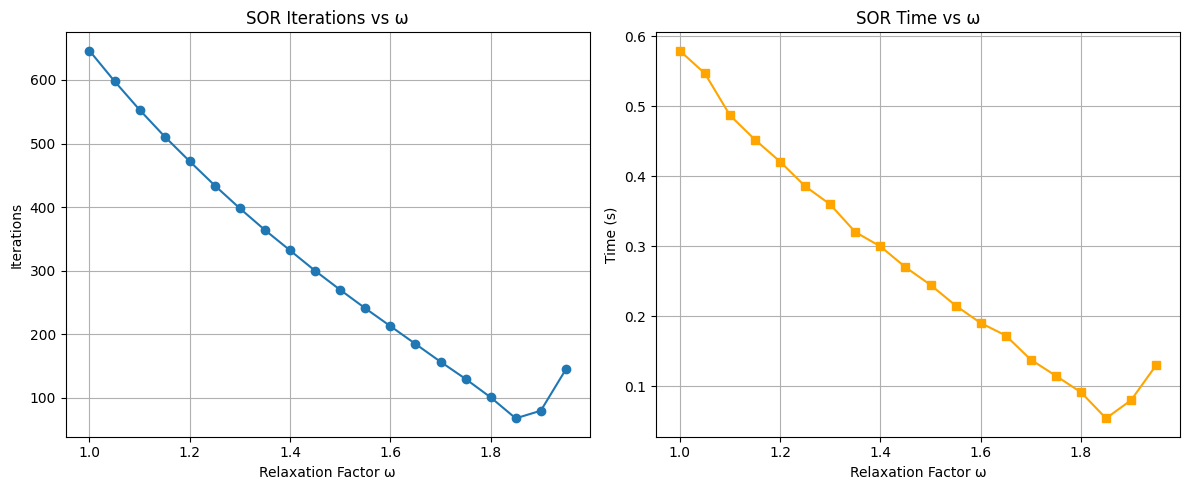

Optimal ω ≈ 1.85


In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt

def sor_poisson(nx, ny, omega, tol=1e-4, max_iter=10000):
    dx = 1.0 / (nx - 1)
    h2 = dx**2
    w = np.zeros((ny, nx))
    f = -1.0

    iterations = 0
    residual = np.inf

    start_time = time.time()
    while residual > tol and iterations < max_iter:
        w_old = w.copy()
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                r = 0.25 * (
                    w[j, i - 1] + w[j, i + 1] +
                    w[j - 1, i] + w[j + 1, i] -
                    h2 * f
                )
                w[j, i] = (1 - omega) * w[j, i] + omega * r
        residual = np.linalg.norm(w - w_old) / np.linalg.norm(w)
        iterations += 1
    return iterations, time.time() - start_time

# Optimize omega
def optimize_sor(nx, ny, tol=1e-4):
    best_omega = None
    best_iters = float('inf')
    results = []

    for omega in np.arange(1.0, 2.0, 0.05):
        iters, t = sor_poisson(nx, ny, omega, tol)
        results.append((omega, iters, t))
        if iters < best_iters:
            best_iters = iters
            best_omega = omega
        print(f"ω = {omega:.2f} → Iterations: {iters}, Time: {t:.4f}s")

    return best_omega, results

# Run optimization for a 40x40 mesh
optimal_omega, results = optimize_sor(40, 40)

# Plot
omegas = [r[0] for r in results]
iterations = [r[1] for r in results]
times = [r[2] for r in results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(omegas, iterations, marker='o')
plt.xlabel("Relaxation Factor ω")
plt.ylabel("Iterations")
plt.title("SOR Iterations vs ω")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(omegas, times, marker='s', color='orange')
plt.xlabel("Relaxation Factor ω")
plt.ylabel("Time (s)")
plt.title("SOR Time vs ω")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Optimal ω ≈ {optimal_omega:.2f}")


***4. Solve the same system using the direct method. Analyse the computation time required as a function of mesh size.***

Mesh 20x20 → Time: 0.0000s
Mesh 40x40 → Time: 0.0000s
Mesh 60x60 → Time: 0.0052s
Mesh 80x80 → Time: 0.0148s
Mesh 100x100 → Time: 0.0149s


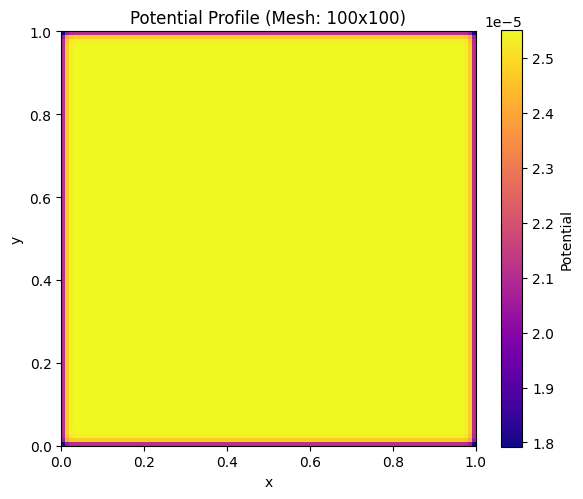

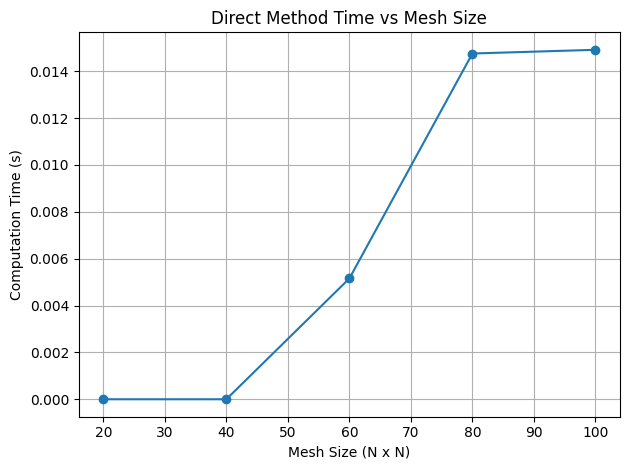

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, eye, csc_matrix
from scipy.sparse.linalg import spsolve
import time

def direct_poisson(nx, ny):
    N = nx * ny
    h = 1.0 / (nx - 1)
    h2 = h * h
    f = -1.0  # source term

    # Construct 1D Laplacian
    main_diag = -4.0 * np.ones(nx)
    side_diag = np.ones(nx - 1)
    lap1d = diags([side_diag, main_diag, side_diag], offsets=[-1, 0, 1], format='csc')

    # 2D Laplacian: A = kron(I, lap1d) + kron(lap1d, I)
    I = eye(nx, format='csc')
    A = kron(I, lap1d) + kron(lap1d, I)

    # Right-hand side vector
    b = f * h2 * np.ones(N)

    # Time and solve
    start = time.time()
    w_flat = spsolve(A, b)
    elapsed = time.time() - start

    w = w_flat.reshape((ny, nx))
    return w, elapsed

# Solve and visualize potential profile
mesh_sizes = [20, 40, 60, 80, 100]
times = []

for size in mesh_sizes:
    w, t = direct_poisson(size, size)
    times.append(t)
    print(f"Mesh {size}x{size} → Time: {t:.4f}s")

# Plot solution for largest grid
plt.figure(figsize=(6, 5))
plt.imshow(w, origin='lower', extent=[0, 1, 0, 1], cmap='plasma')
plt.title(f"Potential Profile (Mesh: {mesh_sizes[-1]}x{mesh_sizes[-1]})")
plt.colorbar(label='Potential')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# Plot time vs mesh size
plt.figure()
plt.plot(mesh_sizes, times, marker='o')
plt.xlabel("Mesh Size (N x N)")
plt.ylabel("Computation Time (s)")
plt.title("Direct Method Time vs Mesh Size")
plt.grid(True)
plt.tight_layout()
plt.show()


Direct solve time: 0.0042 s


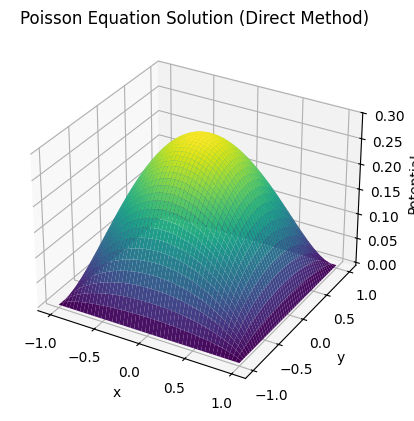

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import kron, eye
from scipy.sparse.linalg import spsolve

# Setup
N = 50  # grid points
x0, xN = -1, 1
y0, yN = -1, 1
dx = (xN - x0) / (N - 1)
dy = (yN - y0) / (N - 1)
x = np.linspace(x0, xN, N)
y = np.linspace(y0, yN, N)
X, Y = np.meshgrid(x, y)

# Define the source term Q (example: constant or function)
Q = np.ones((N, N))  # replace with actual Q as needed

# Direct Solve
T = 2 * np.eye(N-2) - np.eye(N-2, k=1) - np.eye(N-2, k=-1)
TNxN = kron(eye(N-2), T) + kron(T, np.eye(N-2))
Qint = Q[1:-1, 1:-1]  # interior
q = Qint.flatten()  # vector

# Solve using sparse linear solver
from time import time
start = time()
pd = spsolve((1/dx**2) * TNxN, q)
end = time()
print(f"Direct solve time: {end - start:.4f} s")
Pd = np.zeros((N, N))
Pd[1:-1, 1:-1] = pd.reshape((N-2, N-2))

# Plotting the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Pd, cmap='viridis')
ax.set_title('Poisson Equation Solution (Direct Method)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')
plt.show()

Mesh 20x20 → Solve time: 0.0010 s
Mesh 40x40 → Solve time: 0.0046 s
Mesh 60x60 → Solve time: 0.0075 s
Mesh 80x80 → Solve time: 0.0193 s
Mesh 100x100 → Solve time: 0.0312 s


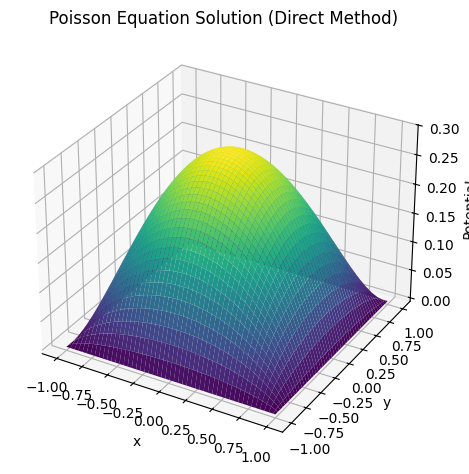

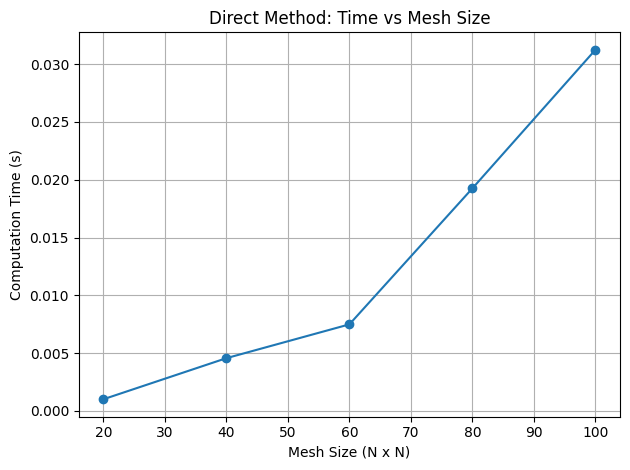

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import kron, eye
from scipy.sparse.linalg import spsolve
from time import time

def solve_poisson_direct(N):
    x0, xN = -1, 1
    dx = (xN - x0) / (N - 1)
    x = np.linspace(x0, xN, N)
    y = np.linspace(x0, xN, N)
    X, Y = np.meshgrid(x, y)

    # Define source term
    Q = np.ones((N, N))
    Qint = Q[1:-1, 1:-1]
    q = Qint.flatten()

    # Construct Laplacian matrix for interior points
    T = 2 * np.eye(N-2) - np.eye(N-2, k=1) - np.eye(N-2, k=-1)
    TNxN = kron(eye(N-2), T) + kron(T, eye(N-2))

    # Solve linear system
    start = time()
    pd = spsolve((1/dx**2) * TNxN, q)
    end = time()
    elapsed = end - start

    # Reconstruct full grid
    Pd = np.zeros((N, N))
    Pd[1:-1, 1:-1] = pd.reshape((N-2, N-2))

    return X, Y, Pd, elapsed

# Time analysis across mesh sizes
mesh_sizes = [20, 40, 60, 80, 100]
times = []

for N in mesh_sizes:
    _, _, _, t = solve_poisson_direct(N)
    times.append(t)
    print(f"Mesh {N}x{N} → Solve time: {t:.4f} s")

# Plot solution for largest grid
X, Y, Pd, _ = solve_poisson_direct(mesh_sizes[-1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Pd, cmap='viridis')
ax.set_title('Poisson Equation Solution (Direct Method)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')
plt.tight_layout()
plt.show()

# Plot computation time vs mesh size
plt.figure()
plt.plot(mesh_sizes, times, marker='o')
plt.xlabel("Mesh Size (N x N)")
plt.ylabel("Computation Time (s)")
plt.title("Direct Method: Time vs Mesh Size")
plt.grid(True)
plt.tight_layout()
plt.show()


Non-uniform source, solve time: 0.0153 s


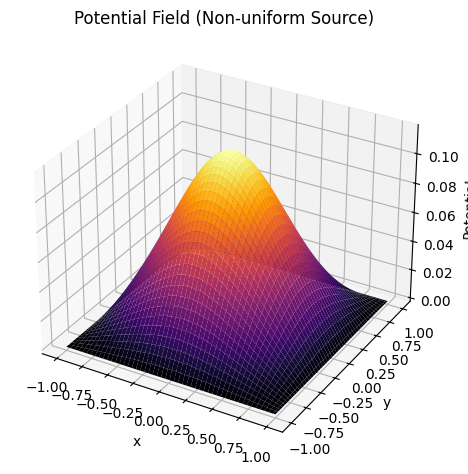

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import kron, eye
from scipy.sparse.linalg import spsolve
from time import time

def solve_poisson_nonuniform(N):
    x0, xN = -1, 1
    dx = (xN - x0) / (N - 1)
    x = np.linspace(x0, xN, N)
    y = np.linspace(x0, xN, N)
    X, Y = np.meshgrid(x, y)

    # Non-uniform source term
    Q = np.exp(-5 * (X**2 + Y**2))  # Gaussian blob centered at (0,0)
    Qint = Q[1:-1, 1:-1]
    q = Qint.flatten()

    # Discrete Laplacian for interior points
    T = 2 * np.eye(N-2) - np.eye(N-2, k=1) - np.eye(N-2, k=-1)
    TNxN = kron(eye(N-2), T) + kron(T, eye(N-2))

    # Solve
    start = time()
    pd = spsolve((1/dx**2) * TNxN, q)
    elapsed = time() - start

    # Insert into full grid
    Pd = np.zeros((N, N))
    Pd[1:-1, 1:-1] = pd.reshape((N-2, N-2))

    return x, y, Pd, elapsed

# Solve and visualize
N = 100
x, y, Pd, time_taken = solve_poisson_nonuniform(N)
X, Y = np.meshgrid(x, y)

print(f"Non-uniform source, solve time: {time_taken:.4f} s")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Pd, cmap='inferno')
ax.set_title('Potential Field (Non-uniform Source)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')
plt.tight_layout()
plt.show()


Solve time (irregular circular domain): 0.0179 s


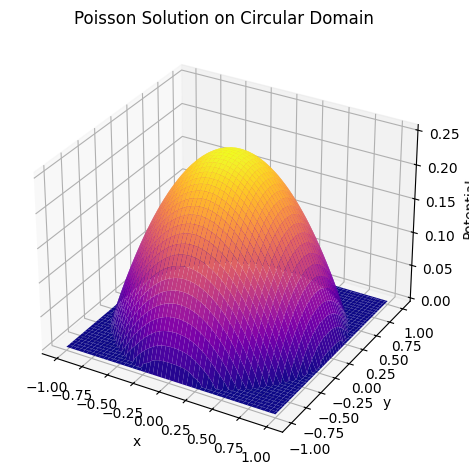

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

def solve_poisson_irregular(N=100):
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, N)
    dx = x[1] - x[0]
    X, Y = np.meshgrid(x, y)
    
    # Define circular mask (inside unit circle)
    mask = X**2 + Y**2 <= 1.0
    index_map = -np.ones_like(mask, dtype=int)
    index_map[mask] = np.arange(np.sum(mask))

    n_unknowns = np.sum(mask)
    A = lil_matrix((n_unknowns, n_unknowns))
    b = np.zeros(n_unknowns)

    # Build Laplacian with Dirichlet boundary
    for j in range(N):
        for i in range(N):
            if not mask[i, j]:
                continue
            idx = index_map[i, j]
            A[idx, idx] = -4
            for (di, dj) in [(-1,0),(1,0),(0,-1),(0,1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < N and 0 <= nj < N and mask[ni, nj]:
                    A[idx, index_map[ni, nj]] = 1
                else:
                    # Dirichlet zero outside the domain
                    b[idx] -= 0
            b[idx] = -1 * dx**2  # non-uniform source (constant here)

    # Solve
    from time import time
    start = time()
    phi_vec = spsolve(A.tocsr(), b)
    elapsed = time() - start

    # Rebuild full grid
    phi = np.zeros_like(mask, dtype=float)
    phi[mask] = phi_vec

    return X, Y, phi, elapsed

# Solve and plot
X, Y, phi, elapsed = solve_poisson_irregular(100)
print(f"Solve time (irregular circular domain): {elapsed:.4f} s")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, phi, cmap='plasma')
ax.set_title('Poisson Solution on Circular Domain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')
plt.tight_layout()
plt.show()


***We want to study the flow profiles for elongated channel cross sections, so-called shallow channels. If κ is the aspect ratio (height/width) of the channel. where we have normalized the velocity w by ∆P h2/∆zη. Investigate how you can incorporate the channel aspect ratio in the code and experiment with different values of it.***


kappa = 1.00, solve time = 0.0398s


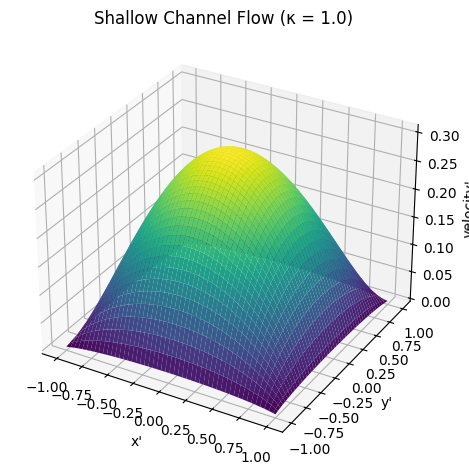

kappa = 0.50, solve time = 0.0432s


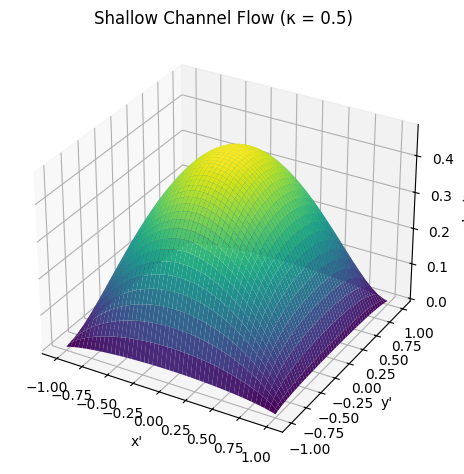

kappa = 0.20, solve time = 0.0411s


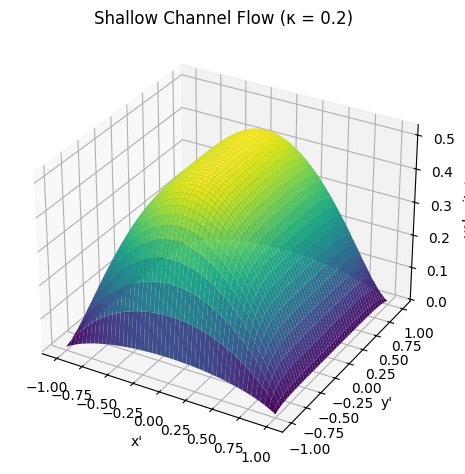

kappa = 0.10, solve time = 0.0303s


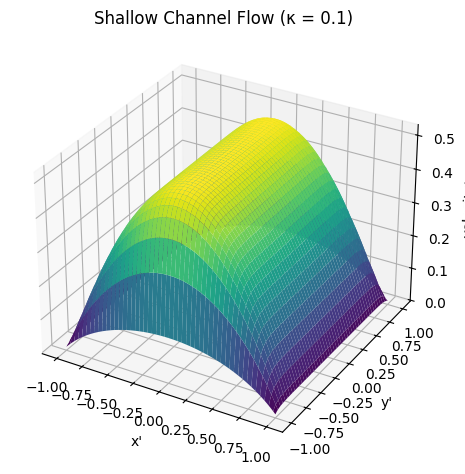

kappa = 0.05, solve time = 0.0370s


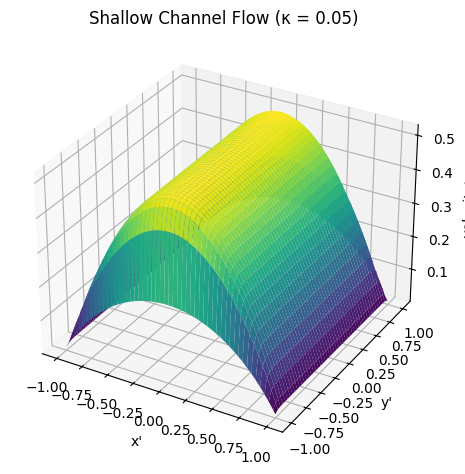

kappa = 0.00, solve time = 0.0056s


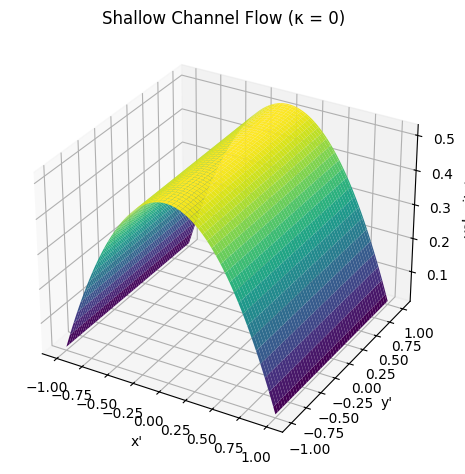

kappa = 2.00, solve time = 0.0343s


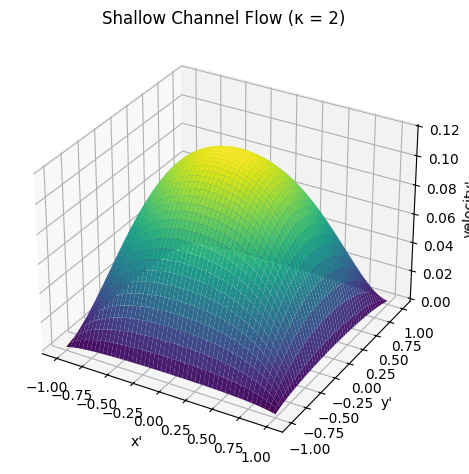

kappa = 10.00, solve time = 0.0338s


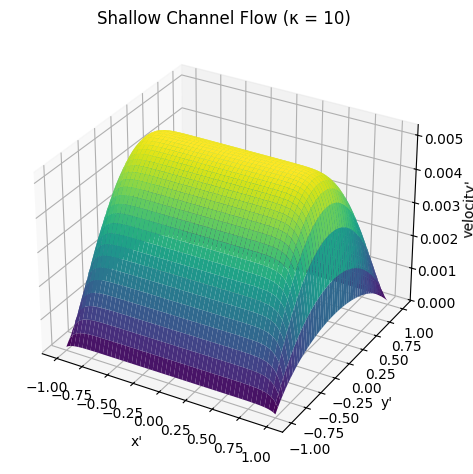

kappa = -1.00, solve time = 0.0359s


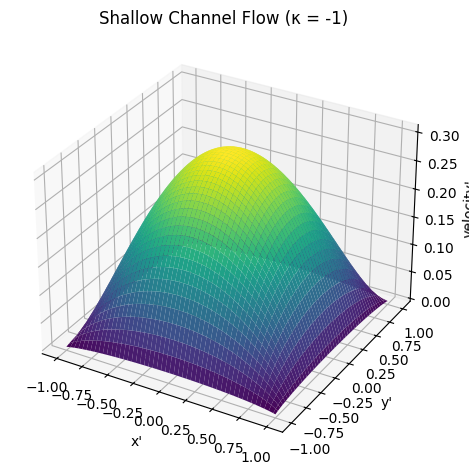

kappa = 100.00, solve time = 0.0340s


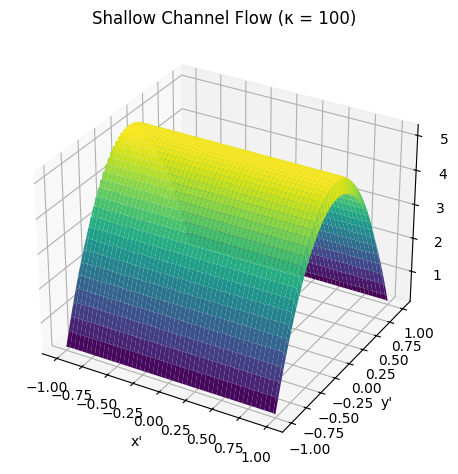

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

def solve_shallow_channel(N=100, kappa=1.0):
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, N)
    dx = x[1] - x[0]
    X, Y = np.meshgrid(x, y)

    # Mask for full domain (square for now)
    mask = np.ones((N, N), dtype=bool)
    index_map = -np.ones_like(mask, dtype=int)
    index_map[mask] = np.arange(np.sum(mask))

    n_unknowns = np.sum(mask)
    A = lil_matrix((n_unknowns, n_unknowns))
    b = np.full(n_unknowns, -1 * dx**2)

    for j in range(N):
        for i in range(N):
            if not mask[i, j]:
                continue
            idx = index_map[i, j]
            A[idx, idx] = -2 * (kappa**2 + 1)
            for (di, dj, weight) in [(-1,0,kappa**2),(1,0,kappa**2),(0,-1,1),(0,1,1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < N and 0 <= nj < N and mask[ni, nj]:
                    A[idx, index_map[ni, nj]] = weight

    # Solve system
    from time import time
    start = time()
    w_flat = spsolve(A.tocsr(), b)
    elapsed = time() - start

    # Rebuild full grid
    W = np.zeros_like(mask, dtype=float)
    W[mask] = w_flat

    return X, Y, W, elapsed

# Try different aspect ratios
aspect_ratios = [1.0, 0.5, 0.2, 0.1, 0.05,0, 2, 10, -1, 100]
for kappa in aspect_ratios:
    X, Y, W, t = solve_shallow_channel(100, kappa=kappa)
    print(f"kappa = {kappa:.2f}, solve time = {t:.4f}s")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, W, cmap='viridis')
    ax.set_title(f'Shallow Channel Flow (κ = {kappa})')
    ax.set_xlabel('x\'')
    ax.set_ylabel('y\'')
    ax.set_zlabel('velocity\'')
    plt.tight_layout()
    plt.show()


***Try to introduce another boundary condition. For instance, one that describes a slip boundary, i.e. zero stress given by ∂w/∂n = 0 (zero normal velocity gradient)***


Solved with slip BC (κ = 1.0), time = 0.0583 s


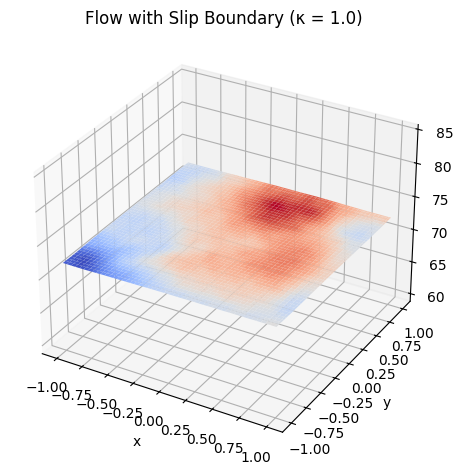

Solved with slip BC (κ = 0.5), time = 0.0402 s


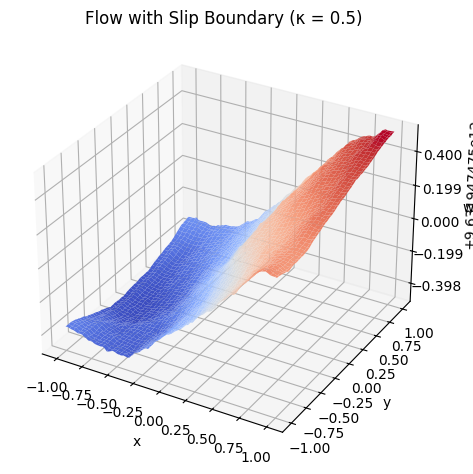

Solved with slip BC (κ = 0.2), time = 0.0490 s


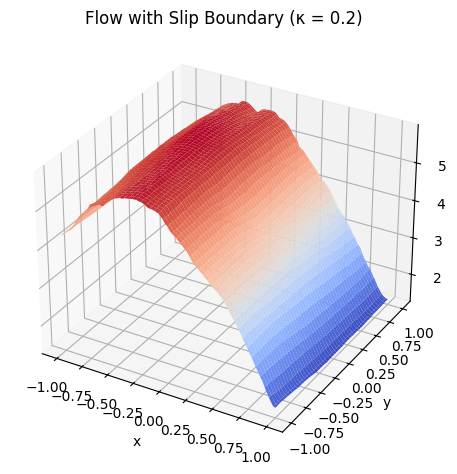

Solved with slip BC (κ = 0.05), time = 0.0413 s


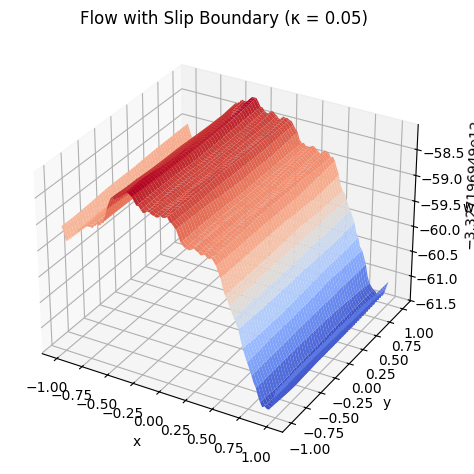

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

def solve_poisson_slip(N=100, kappa=0.5):
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, N)
    dx = x[1] - x[0]
    X, Y = np.meshgrid(x, y)

    idx_map = np.arange(N*N).reshape(N, N)
    A = lil_matrix((N*N, N*N))
    b = np.full(N*N, -1.0 * dx**2)

    for j in range(N):
        for i in range(N):
            idx = idx_map[j, i]
            # Interior point
            A[idx, idx] = -2 * (kappa**2 + 1)

            # x-direction neighbors
            for ni in [i-1, i+1]:
                if 0 <= ni < N:
                    A[idx, idx_map[j, ni]] += kappa**2
                else:  # slip boundary (∂w/∂n = 0) → mirror value
                    A[idx, idx] += kappa**2

            # y-direction neighbors
            for nj in [j-1, j+1]:
                if 0 <= nj < N:
                    A[idx, idx_map[nj, i]] += 1
                else:
                    A[idx, idx] += 1

    # Solve
    from time import time
    start = time()
    w_flat = spsolve(A.tocsr(), b)
    elapsed = time() - start

    W = w_flat.reshape((N, N))
    return X, Y, W, elapsed

# Try slip condition for different kappas
for kappa in [1.0, 0.5, 0.2, 0.05]:
    X, Y, W, t = solve_poisson_slip(N=100, kappa=kappa)
    print(f"Solved with slip BC (κ = {kappa}), time = {t:.4f} s")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, W, cmap='coolwarm')
    ax.set_title(f'Flow with Slip Boundary (κ = {kappa})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('w\'')
    plt.tight_layout()
    plt.show()


**Mix of Slip and non-slip boundary conditions**

Mixed BC solve time: 0.0322 s


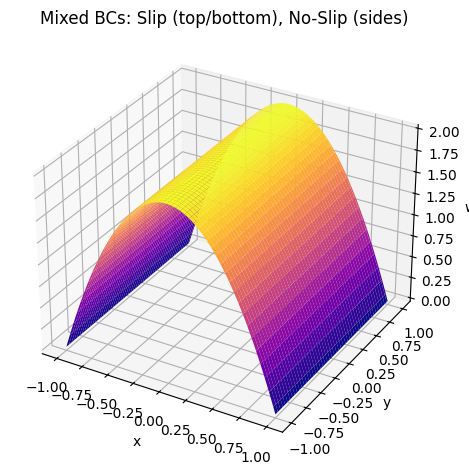

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

def mixed_bc_poisson(N=100, kappa=0.5):
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, N)
    dx = x[1] - x[0]
    X, Y = np.meshgrid(x, y)
    idx_map = np.arange(N*N).reshape(N, N)
    A = lil_matrix((N*N, N*N))
    b = np.full(N*N, -1 * dx**2)

    for j in range(N):
        for i in range(N):
            idx = idx_map[j, i]

            # Left and right: no-slip (Dirichlet w = 0)
            if i == 0 or i == N-1:
                A[idx, idx] = 1
                b[idx] = 0
                continue

            # Interior and slip at top/bottom (∂w/∂y = 0)
            A[idx, idx] = -2 * (kappa**2 + 1)

            # x-neighbors (standard second derivative)
            A[idx, idx_map[j, i-1]] = kappa**2
            A[idx, idx_map[j, i+1]] = kappa**2

            # y-neighbors: slip BC at top/bottom
            if j == 0:  # bottom slip
                A[idx, idx_map[j+1, i]] += 2
            elif j == N-1:  # top slip
                A[idx, idx_map[j-1, i]] += 2
            else:
                A[idx, idx_map[j-1, i]] = 1
                A[idx, idx_map[j+1, i]] = 1

    # Solve
    from time import time
    start = time()
    w_flat = spsolve(A.tocsr(), b)
    elapsed = time() - start
    W = w_flat.reshape((N, N))
    return X, Y, W, elapsed

# Run and plot
X, Y, W, t = mixed_bc_poisson(100, kappa=0.5)
print(f"Mixed BC solve time: {t:.4f} s")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, W, cmap='plasma')
ax.set_title('Mixed BCs: Slip (top/bottom), No-Slip (sides)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.tight_layout()
plt.show()
